In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
n = 10000
mean = (-1, 2)
cov = [[4, 2], [2, 2]]
X = np.random.multivariate_normal(mean, cov, n)


In [2]:
df = pd.DataFrame(X)
# Pandas does the centering for us
df = df -df.mean()
# we center it ourselves
X_centered = X - X.mean(axis=0)

In [3]:
print(df.cov())
print(np.cov(X_centered.T))

          0         1
0  4.085180  2.055767
1  2.055767  2.029858
[[4.08517954 2.05576683]
 [2.05576683 2.02985795]]


Centered covariance using own code
[[4.08517954 2.05576683]
 [2.05576683 2.02985795]]


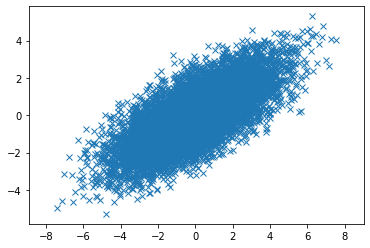

In [4]:
# extract the relevant columns from the centered design matrix of dim n x 2
x = X_centered[:,0]
y = X_centered[:,1]
Cov = np.zeros((2,2))
Cov[0,1] = np.sum(x.T@y)/(n-1.0)
Cov[0,0] = np.sum(x.T@x)/(n-1.0)
Cov[1,1] = np.sum(y.T@y)/(n-1.0)
Cov[1,0]= Cov[0,1]
print("Centered covariance using own code")
print(Cov)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [22]:
# diagonalize and obtain eigenvalues
EigValues, EigVectors = np.linalg.eig(Cov)
# sort eigenvectors and eigenvalues, careful about the order!
#permute = EigValues.argsort()
#EigValues = EigValues[permute]
#EigVectors = EigVectors[:,permute]
print("Eigenvalues of Covariance matrix")
for i in range(2):
    print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
print("First eigenvector")
print(FirstEigvector)
print("Second eigenvector")
print(SecondEigvector)

Eigenvalues of Covariance matrix
5.355836381518991
0.7592011113669757
First eigenvector
[0.85062803 0.52576796]
Second eigenvector
[-0.52576796  0.85062803]


In [23]:
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2Dsl = pca.fit_transform(X)
print("Eigenvector of largest eigenvalue")
print(pca.components_.T[:, 0])
›

Eigenvector of largest eigenvalue
[-0.85062803 -0.52576796]


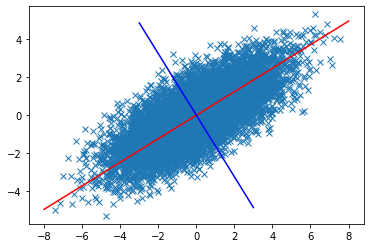

In [24]:
plt.plot(x, y, 'x')
plt.axis('equal')

pcx1 = np.linspace(-8,8,100)
slope1 = FirstEigvector[1]/FirstEigvector[0]
pcy1 = slope1*pcx1
plt.plot(pcx1, pcy1, '-r', label='PCA1')

pcx2 = np.linspace(-3,3,100)
slope2 = SecondEigvector[1]/SecondEigvector[0]
pcy2 = slope2*pcx2
plt.plot(pcx2, pcy2, '-b', label='PCA2')

plt.show()

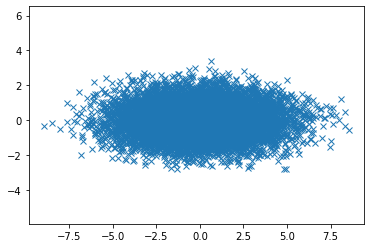

In [45]:
xp = x*FirstEigvector[0]+y*FirstEigvector[1]
yp = x*SecondEigvector[0]+y*SecondEigvector[1]
plt.plot(xp, yp, 'x')
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

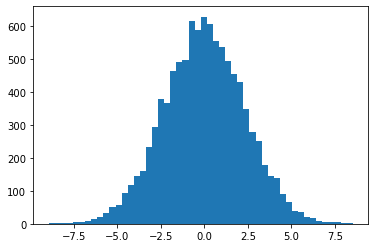

In [46]:
plt.hist(xp,50)
plt.show